In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
my_path = r'C:\Users\nkasb\Desktop\Data analyst programm\Task 6\Project Task_6'

In [4]:
df = pd.read_csv(os.path.join(my_path, '2. Data', 'Data prepared', 'df_merged.csv'))

In [5]:
df.head()

Unnamed: 0  Year      Country  Happiness rank  Happiness score  \
0           0  2015  Switzerland             1.0            7.587   
1           1  2015      Iceland             2.0            7.561   
2           2  2015      Denmark             3.0            7.527   
3           3  2015       Norway             4.0            7.522   
4           4  2015       Canada             5.0            7.427   

   GDP per capita  Social support  Healthy life expectancy  Freedom  \
0         1.39651         1.34951                  0.94143  0.66557   
1         1.30232         1.40223                  0.94784  0.62877   
2         1.32548         1.36058                  0.87464  0.64938   
3         1.45900         1.33095                  0.88521  0.66973   
4         1.32629         1.32261                  0.90563  0.63297   

   Perception of corruption  Generosity  
0                   0.41978     0.29678  
1                   0.14145     0.43630  
2                   0.48357     0.34139  
3                   0.36503     0.34699  
4                   0.32957     0.45811

In [33]:
df.shape

(782, 11)

In [6]:
dups = df[df.duplicated()]

In [7]:
dups

Empty DataFrame
Columns: [Unnamed: 0, Year, Country, Happiness rank, Happiness score, GDP per capita, Social support, Healthy life expectancy, Freedom, Perception of corruption, Generosity]
Index: []

In [8]:
dups.shape

(0, 11)

C:\Users\nkasb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness score', ylabel='Density'>

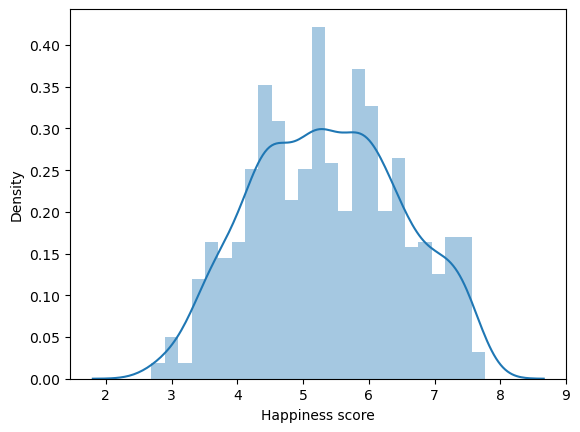

In [9]:
sns.distplot(df['Happiness score'], bins=25)

In [10]:
df['Happiness score'].describe()

count    782.000000
mean       5.379018
std        1.127456
min        2.693000
25%        4.509750
50%        5.322000
75%        6.189500
max        7.769000
Name: Happiness score, dtype: float64

In [11]:
df['Happiness score'].median()

5.322

In [12]:
df.isnull().sum()

Unnamed: 0                  0
Year                        0
Country                     0
Happiness rank              3
Happiness score             0
GDP per capita              0
Social support              0
Healthy life expectancy     0
Freedom                     0
Perception of corruption    1
Generosity                  0
dtype: int64

In [13]:
blanks = df[df['Happiness rank'].isnull()]

In [14]:
blanks

Unnamed: 0  Year  Country  Happiness rank  Happiness score  \
156         156  2015  Burundi             NaN            2.905   
157         157  2015     Togo             NaN            2.839   
314         314  2016  Burundi             NaN            2.905   

     GDP per capita  Social support  Healthy life expectancy  Freedom  \
156         0.01530         0.41587                  0.22396  0.11850   
157         0.20868         0.13995                  0.28443  0.36453   
314         0.06831         0.23442                  0.15747  0.04320   

     Perception of corruption  Generosity  
156                   0.10062     0.19727  
157                   0.10731     0.16681  
314                   0.09419     0.20290

In [15]:
df[df['Perception of corruption'].isnull()]

Unnamed: 0  Year               Country  Happiness rank  Happiness score  \
489         489  2018  United Arab Emirates            20.0            6.774   

     GDP per capita  Social support  Healthy life expectancy  Freedom  \
489           2.096           0.776                     0.67    0.284   

     Perception of corruption  Generosity  
489                       NaN       0.186

In [16]:

df['Perception of corruption'].fillna('0,312', inplace=True)

In [17]:
df['Happiness rank'].fillna(152, inplace = True)

In [18]:
df.isnull().sum()

Unnamed: 0                  0
Year                        0
Country                     0
Happiness rank              0
Happiness score             0
GDP per capita              0
Social support              0
Healthy life expectancy     0
Freedom                     0
Perception of corruption    0
Generosity                  0
dtype: int64

Our hypothesis: The GDP per capita can predict the happiness score of a country

In [19]:
df.plot(x = 'GDP per capita', y='Happiness score',style='o')
plt.title('GDP vs Happiness score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness score')  
plt.show()

In [20]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Happiness score'].values.reshape(-1,1)

In [21]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [22]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
regression = LinearRegression()

In [25]:
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
y_predicted = regression.predict(X_test)

In [27]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

In [29]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


The regression line fits relatively good the data. The slope is positive meaning that the mean of the dependent value (happiness score) increases as the independent value (GDP per capita) increases. The mean square error is small (0.5), and the R2 is about 0.62 (relatively close to 1). The dataset contains 782 which is still small for such an analysis. This confirms a linear relationship between happiness score and GDP per capita. 

In [32]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0    5.525   5.806091
1    6.886   6.446876
2    6.344   6.733791
3    7.119   6.439326
4    3.781   4.039473
5    4.692   5.925228
6    4.390   4.255378
7    5.061   5.024176
8    6.929   6.506131
9    5.488   5.989301
10   6.485   5.719247
11   5.389   5.942637
12   3.334   4.199130
13   5.125   5.399803
14   2.905   3.455578
15   5.835   6.363543
16   4.190   4.452635
17   4.376   5.370807
18   4.800   5.847492
19   5.430   5.278003
20   6.375   7.369058
21   3.975   3.580405
22   4.700   4.664255
23   6.199   6.368995
24   6.611   7.079490
25   7.228   6.390628
26   5.762   6.081266
27   7.600   6.414426
28   3.657   4.355078
29   6.923   6.356014

The predictions of the happiness score on the test set are close to the true values. The closeness between the predictions and the real values shows that the model performed well on the test set.
Biases
GDP is a misleading measure of national wealth and wellbeing. Many key goods, including peacefulness, environmental protection or family bonding, are not measured in GDP because they do not involve transactions.
GDP measures the goods and services produced in an economy during a particular period of time and does not take into account the level of prices in a country.
These biaises can then invalidate the happiness score as a reliable metric of people's happiness and happiness rank.